<a href="https://colab.research.google.com/github/tanishraja21/Diabetes-Prediction-/blob/main/diabetes_health_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Health Prediction

In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

## Data Extraction

In [ ]:
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
df.shape

(253680, 22)

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#transform data
df['Diabetes_binary'] = df['Diabetes_binary'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

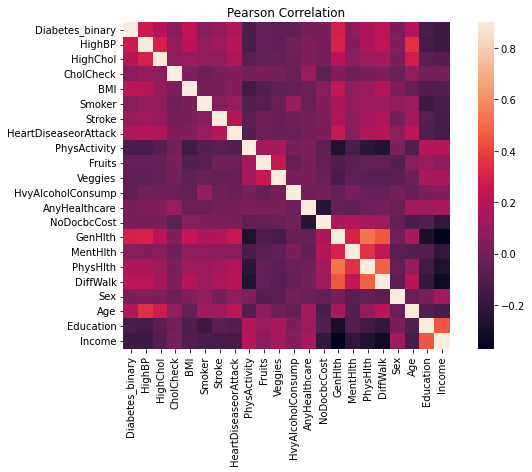

In [ ]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(method='pearson'), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

# Mast kaam

[[53367  1114]
 [ 7590  1349]]
#############################################
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     54481
           1       0.55      0.15      0.24      8939

    accuracy                           0.86     63420
   macro avg       0.71      0.57      0.58     63420
weighted avg       0.83      0.86      0.83     63420



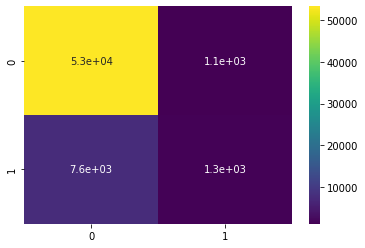

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
X = df[df.columns[df.columns!='Diabetes_binary']]
y= df['Diabetes_binary']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=101)


# Training model
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter=500)
lr1.fit(X_train, y_train)


# Preditction and Confusion Matrix
y_preds =lr1.predict(X_test)

print(confusion_matrix(y_true=y_test, y_pred=y_preds))

print('#############################################')

print(classification_report(y_true=y_test, y_pred=y_preds))

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_preds), annot=True, cmap='viridis')


In [ ]:
# GridSearch before UpSampling
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
with warnings.catch_warnings():
    param_grid = [
      {'LR__solver':['sag','saga','newton-cg']}
     ]
    LR_pipe = Pipeline([
            ('LR', LogisticRegression(C=0.01,penalty = 'l2', max_iter=1000))
        ])

    gcv_results = GridSearchCV(estimator=LR_pipe, param_grid=param_grid, scoring='accuracy', refit=True)
    gcv_results = gcv_results.fit(X_train, y_train)
    print(gcv_results.best_estimator_)
    print(gcv_results.best_score_)


Pipeline(steps=[('LR',
                 LogisticRegression(C=0.01, max_iter=1000,
                                    solver='newton-cg'))])
0.863986124251025


## Upsampling

In [ ]:
# UP SAMPLING
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

smote = SMOTE()
print(y.value_counts())

X_sm, y_sm = smote.fit_resample(X,y)

print(y_sm.value_counts())

0    218334
1     35346
Name: Diabetes_binary, dtype: int64
0    218334
1    218334
Name: Diabetes_binary, dtype: int64


In [ ]:
X.shape

(253680, 21)

In [ ]:
X_sm.shape

(436668, 21)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_sm,y_sm, test_size=0.25, random_state=101)


# Training model
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter=500, penalty='l1', solver='saga')
lr1.fit(X_train, y_train)


# Preditction and Confusion Matrix
y_preds =lr1.predict(X_test)

print(confusion_matrix(y_true=y_test, y_pred=y_preds))

print('#############################################')

print(classification_report(y_true=y_test, y_pred=y_preds))

[[39836 14576]
 [13527 41228]]
#############################################
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     54412
           1       0.74      0.75      0.75     54755

    accuracy                           0.74    109167
   macro avg       0.74      0.74      0.74    109167
weighted avg       0.74      0.74      0.74    109167



In [ ]:
# GridSearch after UpSampling
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
with warnings.catch_warnings():
    param_grid = [
      {'LR__solver':['sag','saga','newton-cg'],
       'LR__C': [0.01, 0.1, 1, 10]}
     ]
    LR_pipe = Pipeline([
            ('LR', LogisticRegression(C=0.01,penalty = 'l2', max_iter=1000))
        ])

    gcv_results = GridSearchCV(estimator=LR_pipe, param_grid=param_grid, scoring='accuracy', refit=True)
    gcv_results = gcv_results.fit(X_train, y_train)
    print(gcv_results.best_estimator_)
    print(gcv_results.best_score_)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Pipeline(steps=[('LR', LogisticRegression(C=10, max_iter=1000, solver='saga'))])
0.7406633828677635


In [ ]:
#split data
X = df.drop('Diabetes_binary', axis = 1)
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(177576, 21)
(177576,)
(76104, 21)
(76104,)


## Random Forest Model

In [ ]:
#build model
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 20.3 s, sys: 292 ms, total: 20.6 s
Wall time: 20.6 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished


0.8589693051613582

In [ ]:
#prediction
y_pred = rf.predict(X_test)
print(y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0 0 0 ... 0 0 0]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished


In [ ]:
#check MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.14103069483864186
Root Mean Squared Error : 0.3755405368780338


[[63593  1757]
 [ 8976  1778]]


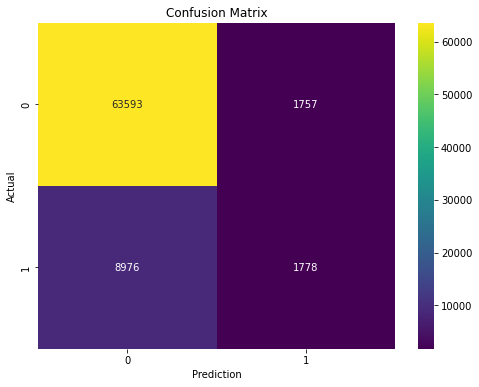

In [ ]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     65350
           1       0.50      0.17      0.25     10754

    accuracy                           0.86     76104
   macro avg       0.69      0.57      0.59     76104
weighted avg       0.82      0.86      0.83     76104



## Check Feature Importance

In [ ]:
#defining of feature
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

BMI                     0.182946
Age                     0.121984
Income                  0.100266
PhysHlth                0.083499
GenHlth                 0.070421
Education               0.070301
MentHlth                0.064000
HighBP                  0.041406
Smoker                  0.033860
Fruits                  0.033164
Sex                     0.027846
HighChol                0.027443
Veggies                 0.026501
PhysActivity            0.025961
DiffWalk                0.023561
HeartDiseaseorAttack    0.018910
NoDocbcCost             0.015357
Stroke                  0.012512
AnyHealthcare           0.008731
HvyAlcoholConsump       0.007669
CholCheck               0.003662
dtype: float64


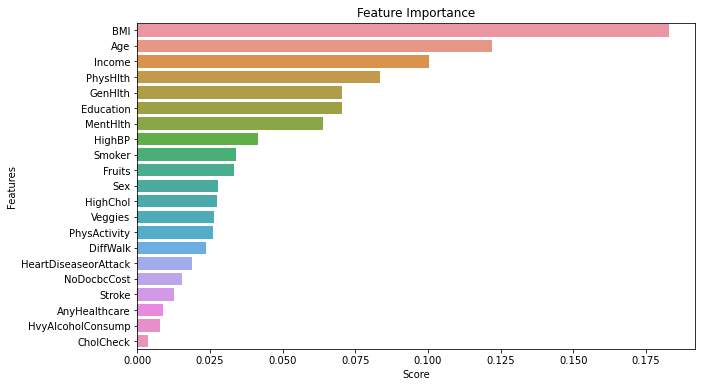

In [ ]:
#visualize feature
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

## Visualization

In [ ]:
#transform data
df.Diabetes_binary[df['Diabetes_binary'] == 0] = 'No Diabetes'
df.Diabetes_binary[df['Diabetes_binary'] == 1] = 'Diabetes'

df.HighBP[df['HighBP'] == 0] = 'No High'
df.HighBP[df['HighBP'] == 1] = 'High BP'

df.HighChol[df['HighChol'] == 0] = 'No High Cholesterol'
df.HighChol[df['HighChol'] == 1] = 'High Cholesterol'

df.CholCheck[df['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df.CholCheck[df['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df.Smoker[df['Smoker'] == 0] = 'No'
df.Smoker[df['Smoker'] == 1] = 'Yes'

df.Stroke[df['Stroke'] == 0] = 'No'
df.Stroke[df['Stroke'] == 1] = 'Yes'

df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 0] = 'No'
df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 1] = 'Yes'

df.PhysActivity[df['PhysActivity'] == 0] = 'No'
df.PhysActivity[df['PhysActivity'] == 1] = 'Yes'

df.Fruits[df['Fruits'] == 0] = 'No'
df.Fruits[df['Fruits'] == 1] = 'Yes'

df.Veggies[df['Veggies'] == 0] = 'No'
df.Veggies[df['Veggies'] == 1] = 'Yes'

df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 0] = 'No'
df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 1] = 'Yes'

df.AnyHealthcare[df['AnyHealthcare'] == 0] = 'No'
df.AnyHealthcare[df['AnyHealthcare'] == 1] = 'Yes'

df.NoDocbcCost[df['NoDocbcCost'] == 0] = 'No'
df.NoDocbcCost[df['NoDocbcCost'] == 1] = 'Yes'

df.GenHlth[df['GenHlth'] == 1] = 'Excellent'
df.GenHlth[df['GenHlth'] == 2] = 'Very Good'
df.GenHlth[df['GenHlth'] == 3] = 'Good'
df.GenHlth[df['GenHlth'] == 4] = 'Fair'
df.GenHlth[df['GenHlth'] == 5] = 'Poor'

df.DiffWalk[df['DiffWalk'] == 0] = 'No'
df.DiffWalk[df['DiffWalk'] == 1] = 'Yes'

df.Sex[df['Sex'] == 0] = 'Female'
df.Sex[df['Sex'] == 1] = 'Male'

df.Education[df['Education'] == 1] = 'Never Attended School'
df.Education[df['Education'] == 2] = 'Elementary'
df.Education[df['Education'] == 3] = 'Junior High School'
df.Education[df['Education'] == 4] = 'Senior High School'
df.Education[df['Education'] == 5] = 'Undergraduate Degree'
df.Education[df['Education'] == 6] = 'Magister'

df.Income[df['Income'] == 1] = 'Less Than $10,000'
df.Income[df['Income'] == 2] = 'Less Than $10,000'
df.Income[df['Income'] == 3] = 'Less Than $10,000'
df.Income[df['Income'] == 4] = 'Less Than $10,000'
df.Income[df['Income'] == 5] = 'Less Than $35,000'
df.Income[df['Income'] == 6] = 'Less Than $35,000'
df.Income[df['Income'] == 7] = 'Less Than $35,000'
df.Income[df['Income'] == 8] = '$75,000 or More'
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40,Yes,No,No,No,No,...,Yes,No,Poor,18,15,Yes,Female,9,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25,Yes,No,No,Yes,No,...,No,Yes,Good,0,0,No,Female,7,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28,No,No,No,No,Yes,...,Yes,Yes,Poor,30,30,Yes,Female,9,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27,No,No,No,Yes,Yes,...,Yes,No,Very Good,0,0,No,Female,11,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24,No,No,No,Yes,Yes,...,Yes,No,Very Good,3,0,No,Female,11,Undergraduate Degree,"Less Than $10,000"


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


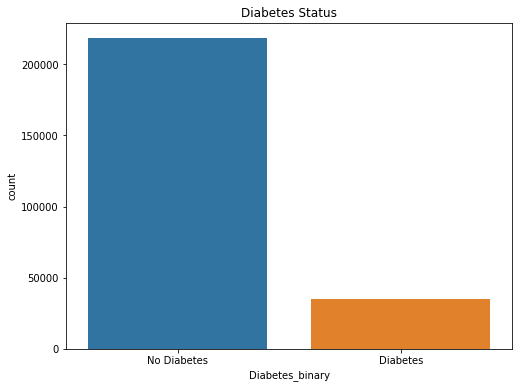

In [ ]:
#visualize diabetes status
plt.figure(figsize = (8,6))
sns.countplot(df['Diabetes_binary'])
plt.title("Diabetes Status")
plt.show()

In [ ]:
#group diabetes status & BP
diabetes_bp = df.groupby(['Diabetes_binary', 'HighBP']).size().reset_index(name = 'Count')
print(diabetes_bp)

  Diabetes_binary   HighBP   Count
0        Diabetes  High BP   26604
1        Diabetes  No High    8742
2     No Diabetes  High BP   82225
3     No Diabetes  No High  136109


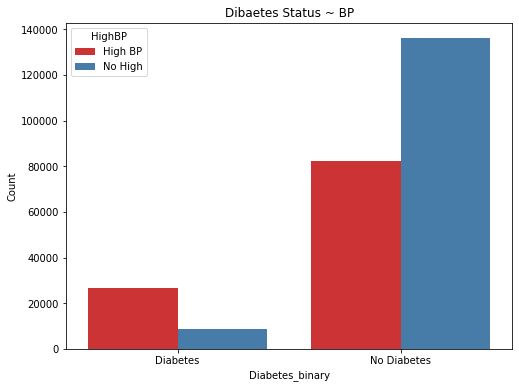

In [ ]:
#visualize diabetes status ~ BP
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HighBP', data = diabetes_bp, palette = 'Set1')
plt.title("Dibaetes Status ~ BP")
plt.show()

In [ ]:
#group diabetes status & cholesterol status
diabetes_chol = df.groupby(['Diabetes_binary', 'HighChol']).size().reset_index(name = 'Count')
print(diabetes_chol)

  Diabetes_binary             HighChol   Count
0        Diabetes     High Cholesterol   23686
1        Diabetes  No High Cholesterol   11660
2     No Diabetes     High Cholesterol   83905
3     No Diabetes  No High Cholesterol  134429


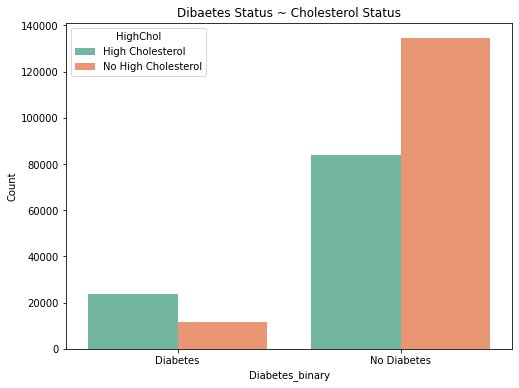

In [ ]:
#visualize diabetes status ~ cholesterol status
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HighChol', data = diabetes_chol, palette = 'Set2')
plt.title("Dibaetes Status ~ Cholesterol Status")
plt.show()

In [ ]:
#group diabetes status & cholesterol check
diabetes_check = df.groupby(['Diabetes_binary', 'CholCheck']).size().reset_index(name = 'Count')
print(diabetes_check)

  Diabetes_binary                        CholCheck   Count
0        Diabetes     Cholesterol Check in 5 Years   35105
1        Diabetes  No Cholesterol Check in 5 Years     241
2     No Diabetes     Cholesterol Check in 5 Years  209105
3     No Diabetes  No Cholesterol Check in 5 Years    9229


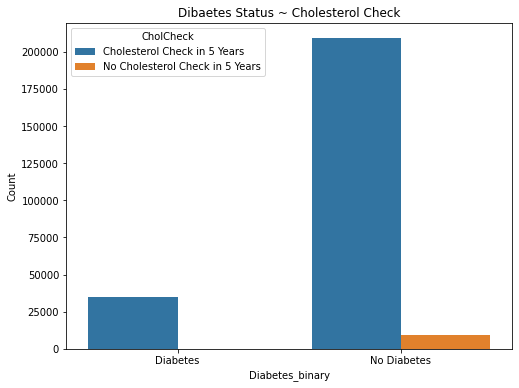

In [ ]:
#visualize diabetes status ~ cholesterol check 
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'CholCheck', data = diabetes_check)
plt.title("Dibaetes Status ~ Cholesterol Check")
plt.show()

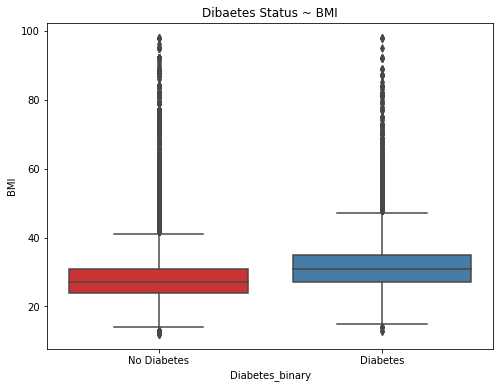

In [ ]:
#visualize diabetes status ~ BMI
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes_binary', y = 'BMI', palette = 'Set1')
plt.title("Dibaetes Status ~ BMI")
plt.show()

In [ ]:
#group diabetes status & smoker status
diabetes_smoker = df.groupby(['Diabetes_binary', 'Smoker']).size().reset_index(name = 'Count')
print(diabetes_smoker)

  Diabetes_binary Smoker   Count
0        Diabetes     No   17029
1        Diabetes    Yes   18317
2     No Diabetes     No  124228
3     No Diabetes    Yes   94106


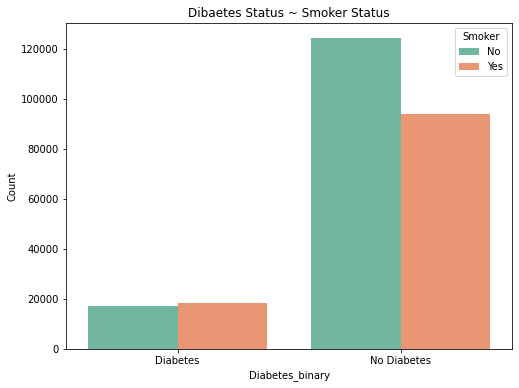

In [ ]:
#visualize diabetes status ~ smoker status 
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Smoker', data = diabetes_smoker, palette = 'Set2')
plt.title("Dibaetes Status ~ Smoker Status")
plt.show()

In [ ]:
#group diabetes status & stroke status
diabetes_stroke = df.groupby(['Diabetes_binary', 'Stroke']).size().reset_index(name = 'Count')
print(diabetes_stroke)

  Diabetes_binary Stroke   Count
0        Diabetes     No   32078
1        Diabetes    Yes    3268
2     No Diabetes     No  211310
3     No Diabetes    Yes    7024


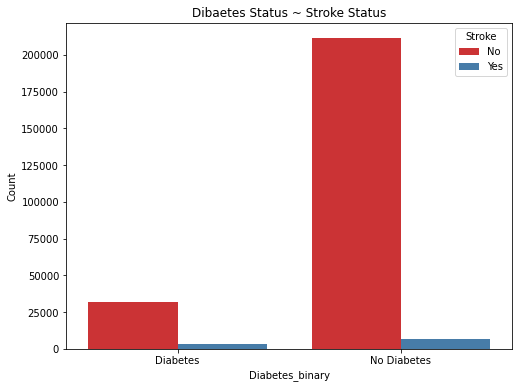

In [ ]:
#visualize diabetes status ~ stroke status 
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Stroke', data = diabetes_stroke, palette = 'Set1')
plt.title("Dibaetes Status ~ Stroke Status")
plt.show()

In [ ]:
#group diabetes status & heart diseaseor attack
diabetes_heart = df.groupby(['Diabetes_binary', 'HeartDiseaseorAttack']).size().reset_index(name = 'Count')
print(diabetes_heart)

  Diabetes_binary HeartDiseaseorAttack   Count
0        Diabetes                   No   27468
1        Diabetes                  Yes    7878
2     No Diabetes                   No  202319
3     No Diabetes                  Yes   16015


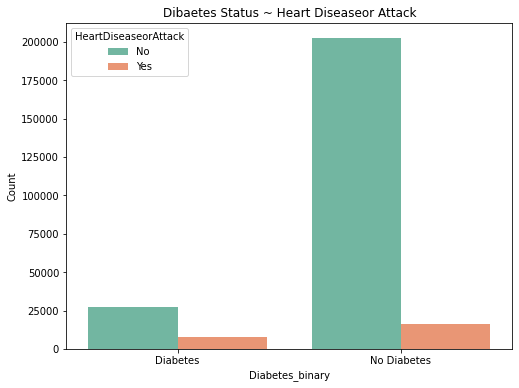

In [ ]:
#visualize diabetes status ~ heart diseaseor attack
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HeartDiseaseorAttack', data = diabetes_heart, palette = 'Set2')
plt.title("Dibaetes Status ~ Heart Diseaseor Attack")
plt.show()

In [ ]:
#group diabetes status & physical activity
diabetes_physical = df.groupby(['Diabetes_binary', 'PhysActivity']).size().reset_index(name = 'Count')
print(diabetes_physical)

  Diabetes_binary PhysActivity   Count
0        Diabetes           No   13059
1        Diabetes          Yes   22287
2     No Diabetes           No   48701
3     No Diabetes          Yes  169633


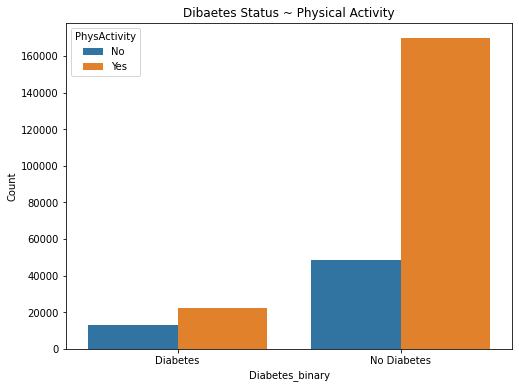

In [ ]:
#visualize diabetes status ~ physical activity
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'PhysActivity', data = diabetes_physical)
plt.title("Dibaetes Status ~ Physical Activity")
plt.show()

In [ ]:
#group diabetes status & fruits
diabetes_fruit = df.groupby(['Diabetes_binary', 'Fruits']).size().reset_index(name = 'Count')
print(diabetes_fruit)

  Diabetes_binary Fruits   Count
0        Diabetes     No   14653
1        Diabetes    Yes   20693
2     No Diabetes     No   78129
3     No Diabetes    Yes  140205


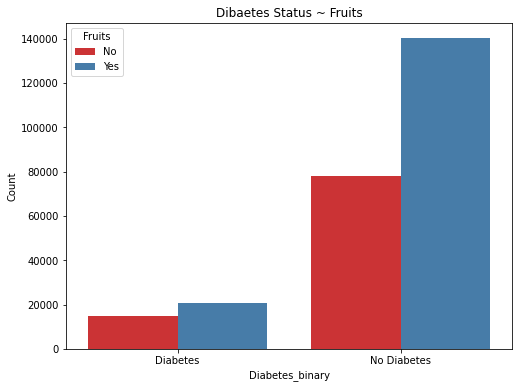

In [ ]:
#visualize diabetes status ~ fruits
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Fruits', data = diabetes_fruit, palette = 'Set1')
plt.title("Dibaetes Status ~ Fruits")
plt.show()

In [ ]:
#group diabetes status & veggies
diabetes_veggies = df.groupby(['Diabetes_binary', 'Veggies']).size().reset_index(name = 'Count')
print(diabetes_veggies)

  Diabetes_binary Veggies   Count
0        Diabetes      No    8610
1        Diabetes     Yes   26736
2     No Diabetes      No   39229
3     No Diabetes     Yes  179105


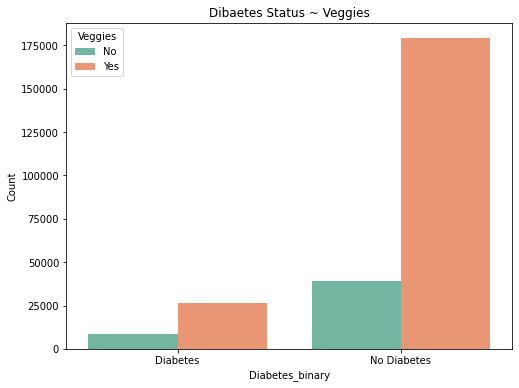

In [ ]:
#visualize diabetes status ~ veggies
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Veggies', data = diabetes_veggies, palette = 'Set2')
plt.title("Dibaetes Status ~ Veggies")
plt.show()

In [ ]:
#group diabetes status & HvyAlcoholConsump
diabetes_alcohol = df.groupby(['Diabetes_binary', 'HvyAlcoholConsump']).size().reset_index(name = 'Count')
print(diabetes_alcohol)

  Diabetes_binary HvyAlcoholConsump   Count
0        Diabetes                No   34514
1        Diabetes               Yes     832
2     No Diabetes                No  204910
3     No Diabetes               Yes   13424


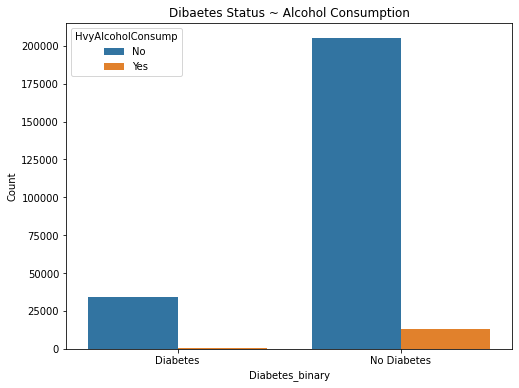

In [ ]:
#visualize diabetes status ~ HvyAlcoholConsump
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HvyAlcoholConsump', data = diabetes_alcohol)
plt.title("Dibaetes Status ~ Alcohol Consumption")
plt.show()

In [ ]:
#group diabetes status & AnyHealthcare
diabetes_healthcare = df.groupby(['Diabetes_binary', 'AnyHealthcare']).size().reset_index(name = 'Count')
print(diabetes_healthcare)

  Diabetes_binary AnyHealthcare   Count
0        Diabetes            No    1422
1        Diabetes           Yes   33924
2     No Diabetes            No   10995
3     No Diabetes           Yes  207339


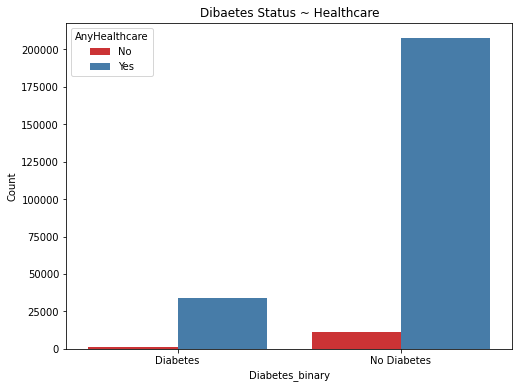

In [ ]:
#visualize diabetes status ~ AnyHealthcare
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'AnyHealthcare', data = diabetes_healthcare, palette = 'Set1')
plt.title("Dibaetes Status ~ Healthcare")
plt.show()

In [ ]:
#group diabetes status & doctor cost
diabetes_NoDocbcCost = df.groupby(['Diabetes_binary', 'NoDocbcCost']).size().reset_index(name = 'Count')
print(diabetes_NoDocbcCost)

  Diabetes_binary NoDocbcCost   Count
0        Diabetes          No   31604
1        Diabetes         Yes    3742
2     No Diabetes          No  200722
3     No Diabetes         Yes   17612


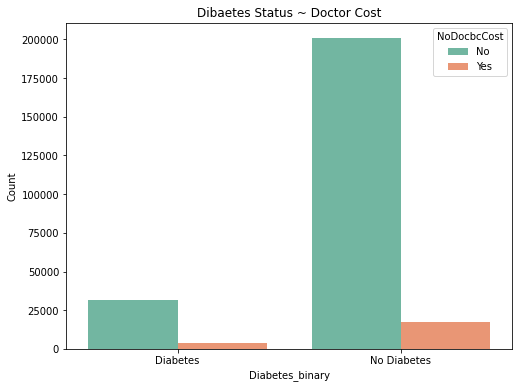

In [ ]:
#visualize diabetes status ~ doctor cost
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'NoDocbcCost', data = diabetes_NoDocbcCost, palette = 'Set2')
plt.title("Dibaetes Status ~ Doctor Cost")
plt.show()

In [ ]:
#group diabetes status & general health
diabetes_general = df.groupby(['Diabetes_binary', 'GenHlth']).size().reset_index(name = 'Count')
print(diabetes_general)

  Diabetes_binary    GenHlth  Count
0        Diabetes  Excellent   1140
1        Diabetes       Fair   9790
2        Diabetes       Good  13457
3        Diabetes       Poor   4578
4        Diabetes  Very Good   6381
5     No Diabetes  Excellent  44159
6     No Diabetes       Fair  21780
7     No Diabetes       Good  62189
8     No Diabetes       Poor   7503
9     No Diabetes  Very Good  82703


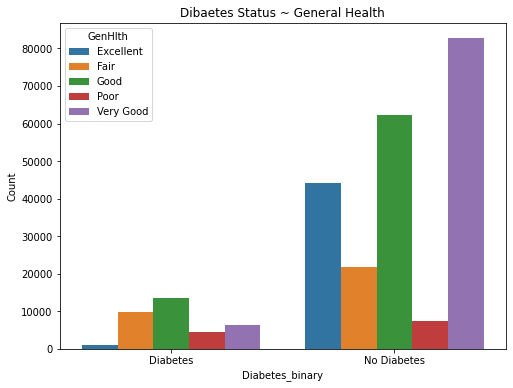

In [ ]:
#visualize diabetes status ~ general health
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'GenHlth', data = diabetes_general)
plt.title("Dibaetes Status ~ General Health")
plt.show()

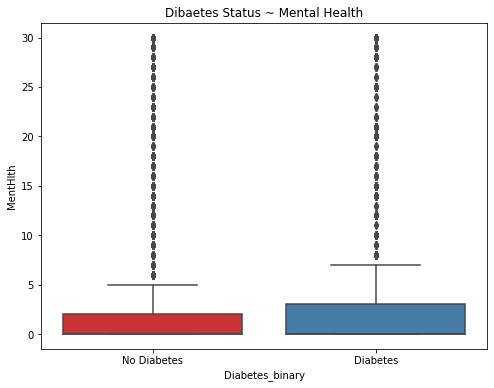

In [ ]:
#visualize diabetes status ~ mental health
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes_binary', y = 'MentHlth', palette = 'Set1')
plt.title("Dibaetes Status ~ Mental Health")
plt.show()

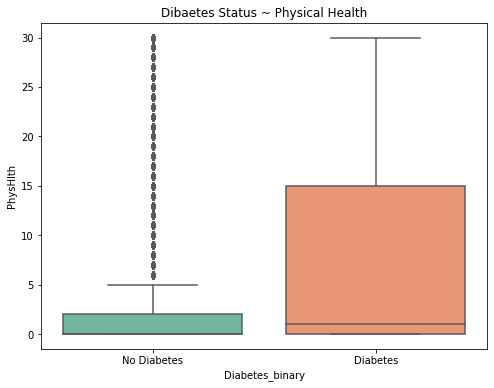

In [ ]:
#visualize diabetes status ~ physical health
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes_binary', y = 'PhysHlth', palette = 'Set2')
plt.title("Dibaetes Status ~ Physical Health")
plt.show()

In [ ]:
#group diabetes status & difficulty walking
diabetes_walk = df.groupby(['Diabetes_binary', 'DiffWalk']).size().reset_index(name = 'Count')
print(diabetes_walk)

  Diabetes_binary DiffWalk   Count
0        Diabetes       No   22225
1        Diabetes      Yes   13121
2     No Diabetes       No  188780
3     No Diabetes      Yes   29554


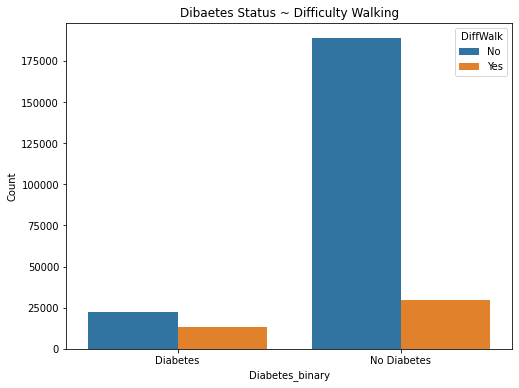

In [ ]:
#visualize diabetes status ~ difficulty walking
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'DiffWalk', data = diabetes_walk)
plt.title("Dibaetes Status ~ Difficulty Walking")
plt.show()

In [ ]:
#group diabetes status & gender
diabetes_sex = df.groupby(['Diabetes_binary', 'Sex']).size().reset_index(name = 'Count')
print(diabetes_sex)

  Diabetes_binary     Sex   Count
0        Diabetes  Female   18411
1        Diabetes    Male   16935
2     No Diabetes  Female  123563
3     No Diabetes    Male   94771


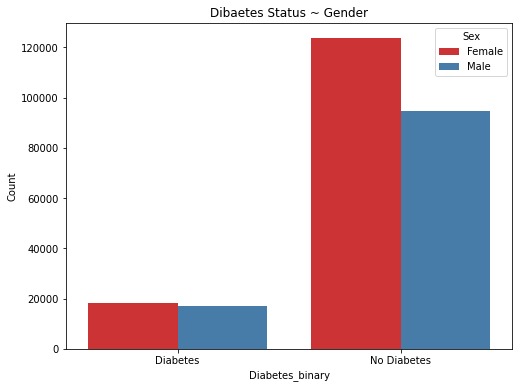

In [ ]:
#visualize diabetes status ~ gender
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Sex', data = diabetes_sex, palette = 'Set1')
plt.title("Dibaetes Status ~ Gender")
plt.show()

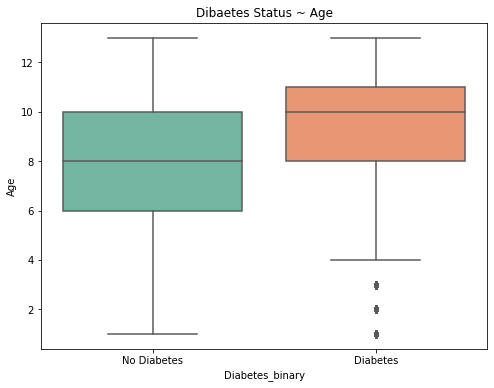

In [ ]:
#visualize diabetes status ~ age
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes_binary', y = 'Age', palette = 'Set2')
plt.title("Dibaetes Status ~ Age")
plt.show()

In [ ]:
#group diabetes status & education
diabetes_education = df.groupby(['Diabetes_binary', 'Education']).size().reset_index(name = 'Count')
print(diabetes_education)

   Diabetes_binary              Education  Count
0         Diabetes             Elementary   1183
1         Diabetes     Junior High School   2296
2         Diabetes               Magister  10400
3         Diabetes  Never Attended School     47
4         Diabetes     Senior High School  11066
5         Diabetes   Undergraduate Degree  10354
6      No Diabetes             Elementary   2860
7      No Diabetes     Junior High School   7182
8      No Diabetes               Magister  96925
9      No Diabetes  Never Attended School    127
10     No Diabetes     Senior High School  51684
11     No Diabetes   Undergraduate Degree  59556


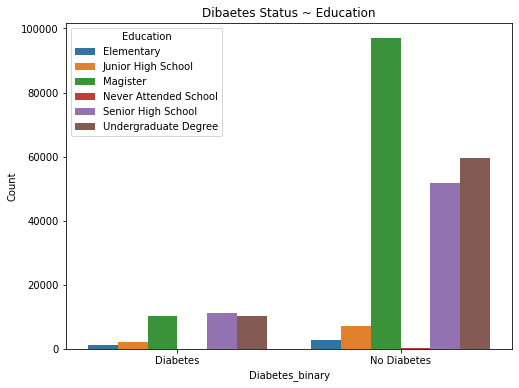

In [ ]:
#visualize diabetes status ~ education
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Education', data = diabetes_education)
plt.title("Dibaetes Status ~ Education")
plt.show()

In [ ]:
#group diabetes status & income
diabetes_income = df.groupby(['Diabetes_binary', 'Income']).size().reset_index(name = 'Count')
print(diabetes_income)

  Diabetes_binary             Income  Count
0        Diabetes    $75,000 or More   7195
1        Diabetes  Less Than $10,000  13091
2        Diabetes  Less Than $35,000  15060
3     No Diabetes    $75,000 or More  83190
4     No Diabetes  Less Than $10,000  44632
5     No Diabetes  Less Than $35,000  90512


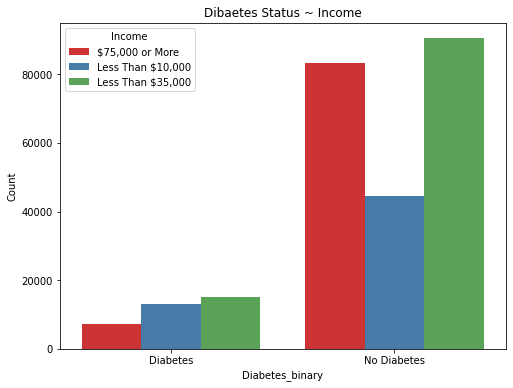

In [ ]:
#visualize diabetes status ~ income
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Income', data = diabetes_income, palette = 'Set1')
plt.title("Dibaetes Status ~ Income")
plt.show()